# generate dataset

In [2]:
from scripts.get_top_stocks import *


top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)

/Users/I748920/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Results saved to 'top_30_stocks_long_only.csv' and 'top_30_stocks_long_short.csv'

Detailed metrics for top stock (Long-Only Strategy) SMCI:
Final Close Price: 284.26
60-day Return: 250.61%
Average Hourly Volatility: 0.6678
Average Sharpe Ratio: 1.6242
Average Hourly Volume: 355714

num common_top_stocks:  35


In [3]:
# specify variables for dataset generation

start_date = '2023-01-01'
end_date = '2024-08-01'
interval = "1h"
trading_days_per_year = 252
hours_per_day = 6.5

In [4]:
from scripts.generate_dataset_features import *


df = get_all_stock_features_df(
    stocks_list=common_top_stocks,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
    trading_days_per_year=trading_days_per_year, 
    hours_per_day=hours_per_day
)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

# training

In [26]:
print(df.shape)
df.head()

(89565, 81)


,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,Momentum256,PriceVolatilityHourly,MACD8,MACD16,MACD32,MACD64,MACD128,MACD256,FamaFrenchMktReturns,Log_Return_shift
0,2023-02-24 13:30:00-05:00,2428.041992,2446.850098,2428.041992,2446.219971,2446.219971,50765,0.006468,0.017106,0.088887,...,1.0,1.0,0.756032,0.350702,-0.453102,-0.286670,2.769173,16.077570,-1.09,0.001956
1,2023-02-24 14:30:00-05:00,2444.520020,2454.419922,2439.465088,2451.010010,2451.010010,63525,0.001956,0.076931,0.111646,...,1.0,1.0,1.483284,0.518276,-0.278292,-0.198128,1.770295,7.539202,-1.09,0.001423
2,2023-02-24 15:30:00-05:00,2448.689941,2455.000000,2441.010010,2454.500000,2454.500000,83267,0.001423,0.107661,0.134490,...,1.0,1.0,2.436091,0.752140,-0.164594,-0.147409,1.435276,5.504961,-1.09,0.028567
3,2023-02-27 09:30:00-05:00,2480.389893,2528.314941,2475.120117,2525.629883,2525.629883,70757,0.028567,-0.020383,-0.081221,...,1.0,1.0,0.754132,0.282749,0.052221,0.003886,0.270682,0.826578,0.31,-0.008246
4,2023-02-27 10:30:00-05:00,2525.469971,2527.050049,2500.000000,2504.889893,2504.889893,52010,-0.008246,-0.114720,-0.152704,...,1.0,1.0,15.234286,1.048808,0.189865,0.042504,0.396862,1.143030,0.31,0.004102


In [28]:
df.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Log_Return', 'EMAVolumeDiff2', 'SMAVolumeDiff2', 'EMACloseDiff2',
       'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2', 'Volatility2',
       'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4', 'EMACloseDiff4',
       'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4', 'Volatility4',
       'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8', 'EMACloseDiff8',
       'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8', 'Volatility8',
       'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16', 'EMACloseDiff16',
       'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16', 'Volatility16',
       'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32', 'EMACloseDiff32',
       'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32', 'Volatility32',
       'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64', 'EMACloseDiff64',
       'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64', 'Volatility64',
       'Momentum64', 'EMAVolumeDiff128', 'SMAVolum

In [30]:
target = "Log_Return_shift"
features = df.columns[8:-1]
len(features)

72

In [141]:
X = df[features].to_numpy()
y = df[target].to_numpy()
X.shape,y.shape

((89565, 72), (89565,))

In [150]:
from scripts.train_predict import *

X_train,y_train,X_val,y_val,X_test,y_test = train_val_test_split(X, y, 0.8, 0.1, 0.1)
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((71652, 72), (71652,), (8956, 72), (8956,), (8957, 72), (8957,))

In [152]:
# Initialize transformations
# Important note: do standard scaling first before PCA
scaler = StandardScaler()
selector = SelectKBest(f_regression, k=10)
pca = PCA(n_components = 0.95)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = selector.fit_transform(X_train, y_train)
X_train = pca.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = selector.transform(X_val)
X_val = pca.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = selector.transform(X_test)
X_test = pca.transform(X_test)

cols_idxs = selector.get_support(indices=True)
# features_df_new = X[:train_size].iloc[:,cols_idxs]
# features_df_new

In [172]:
def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        'hidden_layer_sizes': [(8,64)], # Different architectures
        'activation': ['tanh'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.001], # Different regularization terms
        'learning_rate': ['constant'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPRegressor(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = mean_squared_error(y_val, y_pred)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Test set mean squared error: {round(mse, 5)}")
    print(f"Test set mean absolute error: {round(mae, 5)}")
    
    return y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    y_pred = predict(best_model, X_test, y_test)
    
    plt.plot(y_test,label='test groundtruth')
    plt.plot(y_pred,label='test predictions')
    plt.title(target)
    plt.legend()
    plt.show()
    
    return best_model, best_params, best_score, y_pred

on 0: score: 6.57e-05
|████████████████████████████████████████| 1/1 [100%] in 2.0s (0.51/s) 
Best parameters found: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (8, 64), 'learning_rate': 'constant', 'solver': 'adam'}
Best validation score: 7e-05
Test set mean squared error: 0.00014
Test set mean absolute error: 0.00745


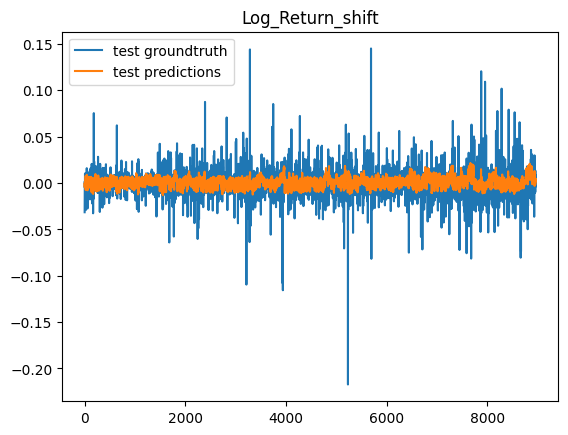

In [178]:
best_model, best_params, best_score, y_pred = train_predict()

Percentage of prediction with correct signal direction: 0.5227196606006476


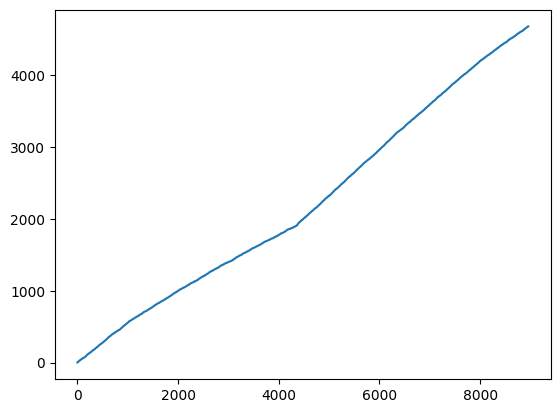

In [179]:
output = []
cumsum = []
for i, v in enumerate(y_pred):
    output.append((y_test[i], y_pred[i]))

output.sort()

total_correct = 0
for x, y in output:
    total_correct += x * y >= 0
    cumsum.append(total_correct)

pct_correct_direction = cumsum[-1] / len(output)
print(f"Percentage of prediction with correct signal direction: {pct_correct_direction}")
plt.plot(cumsum)